<br>
<div align="center"><span style="font-size:32px;color:darkblue">TP 3 Analyse Factorielle des correspndances</span></div><br><br>


<span>&#9757;</span> On commence par importer nos packages préférés `pandas` et `numpy`.

In [2]:
import pandas as pd
import numpy as np
library("gplots")

puis importer nos données et vérifier la taille et leur nature:

In [2]:
df = pd.read_excel("media.xls",sheet_name=0,header=0,index_col=0)
df


,Radio,Tel.,Quot.Nat.,Quot.Reg.,Press.Mag.,Press.TV
Prof,,,,,,
Agriculteur,96,118,2,71,50,17
Petit.Patr.,122,136,11,76,49,41
Prof.Cad.Sup,193,184,74,63,103,79
Prof.Int.,360,365,63,145,141,184
Employe,511,593,57,217,172,306
Ouvr.Qualif.,385,457,42,174,104,220
Ouvr.Non-Qual.,156,185,8,69,42,85
Inactif,1474,1931,181,852,642,782


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, Agriculteur to Inactif
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Radio       8 non-null      int64
 1   Tel.        8 non-null      int64
 2   Quot.Nat.   8 non-null      int64
 3   Quot.Reg.   8 non-null      int64
 4   Press.Mag.  8 non-null      int64
 5   Press.TV    8 non-null      int64
dtypes: int64(6)
memory usage: 448.0+ bytes


<span>&#9999;</span>  Quelles sont les deux variables étudiées?

-Les variables étudiées sont la profession et les médias

<span>&#9757;</span>  Créer les variables I et J contenant le nombre de modalités de chaque variable et les afficher

In [4]:
I= 8
J = 6
print (I, J)

8 6


<span>&#9757;</span>  Créer la variable N contenant le nombre d'individus et l'afficher.

In [5]:
N=sum(df.sum())
N

12388

On étudie ici 2 variables qualitatives. On va donc faire une analyse factorielle des correspondances. Pour cela on utilise la classe `CA` du package `fanalysis`. Ce package a été développé récemment par Olivier Garcia, vous pouvez avoir plus de renseignement sur la page https://github.com/OlivierGarciaDev. Il va nous fournir plein de calculs et graphiques clef en main. Ce package peut aussi être utilisé pour faire une ACP (et eviter de calculer à la main les qualités et les contributions comme nous l'avons fait au TP1).

Ce package n'est a priori pas déjà installé dans votre Anaconda. Il faut passer par Anaconda prompt pour l'installer: https://datatofish.com/how-to-install-python-package-in-anaconda/

In [6]:
import fanalysis

Ici les données sont déjà sous forme de tableau de contingence. Sinon, on aurait pu utiliser la fonction `crosstab` sur les données brutes pour extraire ce tableau.

Dans le cas d'un tableau de contingence, les données en lignes et en colonnes jouent le même role (il n'y a pas d'opposition individus/variables). Le dataframe n'est donc pas le format approprié. La package `fanalysis` travaille sur les numpy.array et pas des dataframe. Dans la suite, on va donc transformer notre dataframe en tableau (quitte à utiliser pd.DataFrame pour un affichage agréable).

In [7]:
tab=df.values
tab

array([[  96,  118,    2,   71,   50,   17],
       [ 122,  136,   11,   76,   49,   41],
       [ 193,  184,   74,   63,  103,   79],
       [ 360,  365,   63,  145,  141,  184],
       [ 511,  593,   57,  217,  172,  306],
       [ 385,  457,   42,  174,  104,  220],
       [ 156,  185,    8,   69,   42,   85],
       [1474, 1931,  181,  852,  642,  782]], dtype=int64)

On ferra bien attention dans la suite: df est le dataframe, tab est le tableau des valeurs.

# Liaison

On commence par vérifier si nos variables sont liées, on effectue donc un test d'indépendance du $\chi^2$. On utilise par exemple celui de la librairie `scipy`. La fonction chi2_contengency appliqué à un tableau croisé va renvoyer 4 informations:
- la valeur de la statistique de test
- la p-valeur
- le nombre de degré de liberté, c'est-à-dire le paramètre du $\chi^2:~ (I-1)\times (J-1)$
- le tableau des effectifs indépendants.


In [8]:
from scipy.stats import chi2_contingency

<span>&#9757;</span>  Faire un test du $\chi^2$ sur `df`.

In [9]:
k2=chi2_contingency(df)
k2

(275.9953222418554,
 3.1509173161703053e-39,
 35,
 array([[  94.21520827,  113.41830804,   12.5163061 ,   47.6362609 ,
           37.23458185,   48.97933484],
        [ 115.77292541,  139.36995479,   15.38020665,   58.53608331,
           45.75435906,   60.18647078],
        [ 185.23668066,  222.99192767,   24.60833064,   93.65773329,
           73.20697449,   96.29835325],
        [ 334.8099774 ,  403.05150145,   44.4788505 ,  169.28366161,
          132.31950274,  174.0565063 ],
        [ 493.96448176,  594.64514046,   65.62221505,  249.75395544,
          195.21859864,  256.79560865],
        [ 367.81191476,  442.77994834,   48.86309332,  185.96980949,
          145.36212464,  191.21310946],
        [ 145.04883758,  174.61293187,   19.26945431,   73.33831127,
           57.32442686,   75.4060381 ],
        [1560.13997417, 1878.13028737,  207.26154343,  788.82418469,
          616.57943171,  811.06457862]]))

<span>&#9999;</span> Répondez aux questions suivantes:
- Combien vaut la statistique de test?
        275.9953222418554
    
- Quelle est la conclusion du test?
       3.1509173161703053e-39
       La p-value < 5% donc le test n'est pas sigificatif, on rejette H0
   
- Vérifier que le degré de liberté est le bon.
        35

- Combien vaut l'effectif sous hypotheses d'indépendance des agriculteurs qui s'informent par la télévision.
 **113.41830804**

<span>&#9757;</span> Combien vaut l'inertie?

In [10]:
inertie=k2[0]/N

inertie

0.022279247839994784

 <span>&#9757;</span> Vérifier par le calcul la  valeur du coefficient d'associtation du $\chi^2$.

In [11]:
Indep= ((tab - k2[3])**2)/k2[3]
khi2= np.sum(Indep)
khi2

275.9953222418554

# Profils lignes, profils colonnes

On va maintenant calculer les profils lignes et colonnes.

 <span>&#9757;</span> Créer 2 variables `media` et `prof` avec les effectifs marginaux.

In [12]:
media = np.sum(df.values, axis=0)
media

array([3297, 3969,  438, 1667, 1303, 1714], dtype=int64)

In [13]:
prof = np.sum(df.values, axis=1)
prof

array([ 354,  435,  696, 1258, 1856, 1382,  545, 5862], dtype=int64)

In [14]:
print(media.shape)
print(prof.shape)

(6,)
(8,)


Attention, verifiez bien que vous n'avez pas inversé les 2 en regardant leurs dimensions.

 <span>&#9757;</span> Créer, à l'aide d'une double boucle for par exemple, les tableaux des profils lignes `profil_row` et des profils colonnes `profil_col`.

In [15]:
profil_col=np.zeros((I,J))

for i in range(I):
    for j in range(J):
        profil_col[i,j]=tab[i,j]/media[j]
        
profil_col

array([[0.02911738, 0.02973041, 0.00456621, 0.04259148, 0.03837299,
        0.00991832],
       [0.03700334, 0.03426556, 0.02511416, 0.04559088, 0.03760553,
        0.02392065],
       [0.05853806, 0.04635928, 0.16894977, 0.03779244, 0.07904835,
        0.04609102],
       [0.10919017, 0.09196271, 0.14383562, 0.0869826 , 0.10821182,
        0.10735123],
       [0.15498938, 0.14940791, 0.13013699, 0.13017397, 0.13200307,
        0.17852975],
       [0.11677282, 0.11514235, 0.09589041, 0.10437912, 0.07981581,
        0.12835473],
       [0.04731574, 0.04661124, 0.01826484, 0.04139172, 0.03223331,
        0.0495916 ],
       [0.4470731 , 0.48652053, 0.41324201, 0.51109778, 0.49270913,
        0.45624271]])

In [16]:
profil_row=np.zeros((I,J))

for i in range(I):
    for j in range(J):
        profil_row[i,j]=tab[i,j]/prof[i]
        
profil_row

array([[0.27118644, 0.33333333, 0.00564972, 0.20056497, 0.14124294,
        0.0480226 ],
       [0.28045977, 0.31264368, 0.02528736, 0.17471264, 0.11264368,
        0.09425287],
       [0.27729885, 0.26436782, 0.10632184, 0.09051724, 0.14798851,
        0.11350575],
       [0.28616852, 0.29014308, 0.05007949, 0.11526232, 0.11208267,
        0.14626391],
       [0.27532328, 0.31950431, 0.03071121, 0.1169181 , 0.09267241,
        0.16487069],
       [0.27858177, 0.33068017, 0.03039074, 0.12590449, 0.07525326,
        0.15918958],
       [0.28623853, 0.33944954, 0.0146789 , 0.1266055 , 0.07706422,
        0.1559633 ],
       [0.25145002, 0.32940976, 0.03087683, 0.14534289, 0.10951894,
        0.13340157]])

On peut vérifier que nos profils somment bien à 1:

In [17]:
print(np.sum(profil_row,axis=1))
print(np.sum(profil_col,axis=0))

[1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1.]


Pour les visualiser, on utilise:

In [18]:
import matplotlib.pyplot as plot

In [19]:
df_profil_row=pd.DataFrame(profil_row,index=df.index,columns=df.columns)
df_profil_row

,Radio,Tel.,Quot.Nat.,Quot.Reg.,Press.Mag.,Press.TV
Prof,,,,,,
Agriculteur,0.271186,0.333333,0.005650,0.200565,0.141243,0.048023
Petit.Patr.,0.280460,0.312644,0.025287,0.174713,0.112644,0.094253
Prof.Cad.Sup,0.277299,0.264368,0.106322,0.090517,0.147989,0.113506
Prof.Int.,0.286169,0.290143,0.050079,0.115262,0.112083,0.146264
Employe,0.275323,0.319504,0.030711,0.116918,0.092672,0.164871
Ouvr.Qualif.,0.278582,0.330680,0.030391,0.125904,0.075253,0.159190
Ouvr.Non-Qual.,0.286239,0.339450,0.014679,0.126606,0.077064,0.155963
Inactif,0.251450,0.329410,0.030877,0.145343,0.109519,0.133402


<AxesSubplot:ylabel='Prof'>

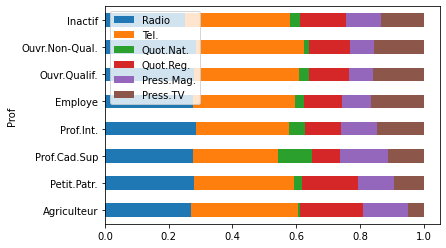

In [20]:
df_profil_row.plot.barh(stacked=True, edgecolor='none')

<AxesSubplot:>

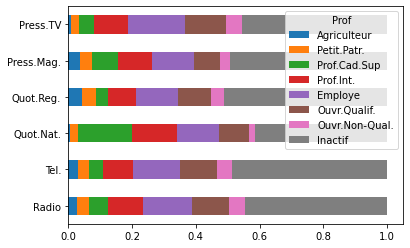

In [21]:
pd.DataFrame(profil_col.T,index=df.columns,columns=df.index).plot.barh(stacked=True, edgecolor='none')

# AFC avec la classe CA

## Instanciation

On crée une instance de la classe `CA`, en lui précisant les étiquettes des lignes et des colonnes puis on applique le modèle à nos données en utilisant `fit` sur notre tableau. Ce tableau doit être un tableau de contingence, au format numpy.array.

In [22]:
from fanalysis.ca import CA

In [23]:
df_afc = CA(row_labels=df.index.values, col_labels=df.columns.values)
df_afc.fit(tab)

CA(col_labels=array(['Radio', 'Tel.', 'Quot.Nat.', 'Quot.Reg.', 'Press.Mag.',
       'Press.TV'], dtype=object),
   row_labels=array(['Agriculteur', 'Petit.Patr.', 'Prof.Cad.Sup', 'Prof.Int.',
       'Employe', 'Ouvr.Qualif.', 'Ouvr.Non-Qual.', 'Inactif'],
      dtype=object))

On peut comme argument à CA le nombres d'axes à garder en précisant: `n_components=`. Pour l'instant on préfère ne pas le faire.

Cette méthode `df_afc.fit(df.values)` contient notamment les attributs suivants:
- `df_afc.eig_` donne les valeurs propres, les pourcentages d'inertie expliquée et les pourcentages cumulés.
- `df_afc.row_coord_` donne les coordonnées des points lignes selon les axes factoriels
- `df_afc.col_coord_` donne les coordonnées des points colonnes selon les axes factoriels


## Valeurs propres

In [24]:
df_afc.eig_ 
#df_afc.eig_[0] juste pour les valeurs propres

array([[1.38572868e-02, 7.21068498e-03, 8.24731391e-04, 3.03851641e-04,
        8.26930155e-05],
       [6.21981806e+01, 3.23650288e+01, 3.70179190e+00, 1.36383258e+00,
        3.71166101e-01],
       [6.21981806e+01, 9.45632094e+01, 9.82650013e+01, 9.96288339e+01,
        1.00000000e+02]])

<span>&#9999;</span> Combien y a-t-il de valeurs propres? Est-ce cohérent?

- 5 valeurs propres. Le nombre de valeurs propres est égal au minimum entre I-1 et J-1, On n'a J-1 valeurs propres donc c'est cohérent.

<span>&#9999;</span> Combien valent les deux premières valeurs propres?

- 1.38572868e-02, 7.21068498e-03,

<span>&#9757;</span> Retrouver la valeur de l'inertie.

In [25]:
Inert= sum(df_afc.eig_[0])
Inert

0.022279247839994784

On peut tracer les valeurs propres grâce à la fonction suivante (même pas besoin de lex extraire nous même, et oui c'est pratique quand quelqu'un crée un package sur mesure!):

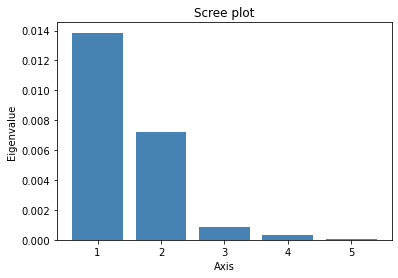

In [26]:
df_afc.plot_eigenvalues()

Vous pouvez aussi tracer les pourcentages ou les pourcentafes cumulés à l'aide des commandes suivantes:

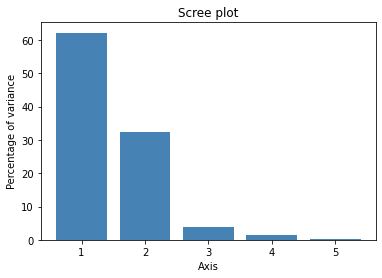

In [27]:
df_afc.plot_eigenvalues(type="percentage")


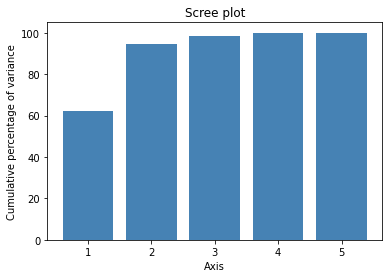

In [28]:
df_afc.plot_eigenvalues(type="cumulative")

<span>&#9999;</span> Quel est le pourcentage expliqué par les 2 premiers axes? Combien d'axes faut-il garder d'après vous? 

- le pourcentage expliqué par les 2 premiers axes est 94,56 % donc ont peut garder les deux premiers axes

## Nouvelles coordonnées des poins lignes et colonnes

On rappelle que l'AFC voit les profils lignes et les profils colonnes comme des points dans un espace à plusieurs dimensions. Le but d'en extraire des représentations graphiques dans un (ou plusieurs) plan factoriel.


In [29]:
df_afc.row_coord_

array([[ 0.16614986,  0.30961174, -0.07183812, -0.01443258,  0.02144011],
       [ 0.06837709,  0.14315064, -0.0644217 ,  0.02037032, -0.02568674],
       [-0.42997558,  0.06087258, -0.00302124,  0.01681116,  0.01123318],
       [-0.10660251, -0.03259679, -0.03089814, -0.02533304, -0.01195531],
       [ 0.01572857, -0.09546893, -0.00508681, -0.02029446,  0.00346168],
       [ 0.04371252, -0.1013786 , -0.01932335,  0.03541129, -0.00173011],
       [ 0.11779685, -0.09486419, -0.03972798,  0.00349309,  0.02248439],
       [ 0.0325837 ,  0.03339524,  0.02596802,  0.00055285, -0.00093525]])

In [30]:
df_afc.col_coord_

array([[-0.01494022, -0.02210596, -0.04670175, -0.00266194,  0.00068016],
       [ 0.05328288, -0.002081  ,  0.01645288,  0.0112183 ,  0.00985007],
       [-0.54067502,  0.00620677,  0.02054203,  0.03952278, -0.00661745],
       [ 0.10882837,  0.10964537,  0.00522829,  0.01304161, -0.01656044],
       [-0.09481257,  0.13249659,  0.01875847, -0.03830946,  0.0037189 ],
       [ 0.00975363, -0.16160888,  0.02714057, -0.01451757, -0.00914728]])

On n'a pas vraiment besoin de ces fonctions car le package fanalysis nous fournit un outil pour faire la representation graphique directement (cf ci dessous).

## Contributions et qualités

Lors de l'instanciation de l'AFC, d'autres quantités interessantes ont été automatiquement calculées telles que: 
* `df_afc.row_contrib_` : contributions des profils (ou modalités) lignes à l'inertie de l'axe
* `df_afc.col_contrib_` : contributions des profils (ou modalités) colonnes à l'inertie de l'axe
* `df_afc.row_cos2_` : qualités (dites cosinus carrés) des points lignes
* `df_afc.col_cos2_` : qualités (dites cosinus carrés) des points colonnes

*Remarque:* Si l'on avait souhaité éviter le calcul de ces quantités pour gagner du temps et économiser des ressources mémoire, il aurait fallu préciser `stats=False` en argument de `CA`.

# Représentations graphiques et interpretations

## Représentations graphiques

On utilise les coordonnées obtenues précédemment pour représenter sur un même plan nos poinst lignes et colonnes grâce à la fonction `mapping`. On précise en paramètres quels sont les axes que l'on souhaite représeter.

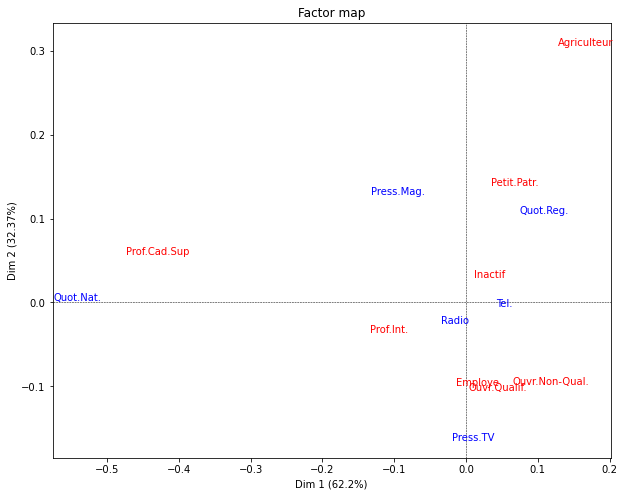

In [31]:
df_afc.mapping(num_x_axis=1, num_y_axis=2,figsize=(10, 8))

Si on ne souhaite que les points lignes on utilise la commande suivante:

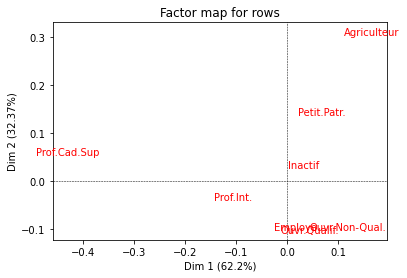

In [32]:
df_afc.mapping_row(num_x_axis=1, num_y_axis=2)

<span>&#9757;</span> Afficher uniquement les points colonnes

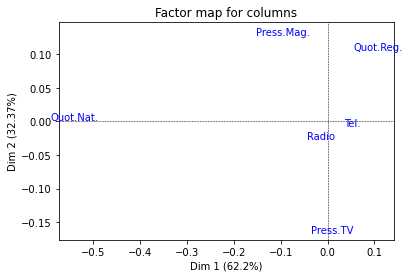

In [33]:
df_afc.mapping_col(num_x_axis=1, num_y_axis=2)

<span>&#9757;</span> Afficher les points lignes et colonnes dans le plan constitué du premier et du troisième axe.

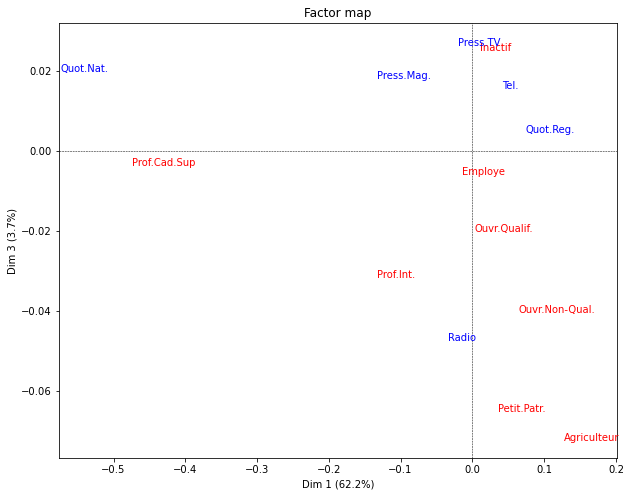

In [34]:
df_afc.mapping(num_x_axis=1, num_y_axis=3,figsize=(10, 8))

## Interprétation

Pour interpréter les axes, on va utiliser les qualités et les contributions. Encore une fois, le package fanalysis nous fournit tous les graphiques dont nous avons besoin sans effort. La commande suivante permet de visualiser rapidement les contributions des points lignes au premier axe puis de vérifier leurs qualités de représentations.

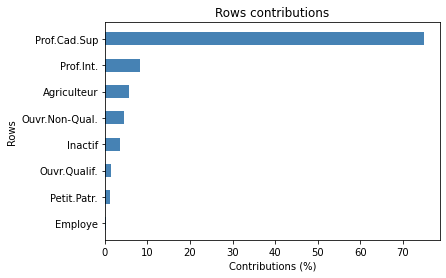

In [35]:
df_afc.plot_row_contrib(num_axis=1)

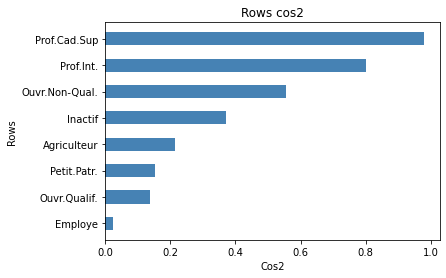

In [36]:
df_afc.plot_row_cos2(num_axis=1)

<span>&#9757;</span> Afficher les contributions des points colonnes au premier axe, et leurs qualités.

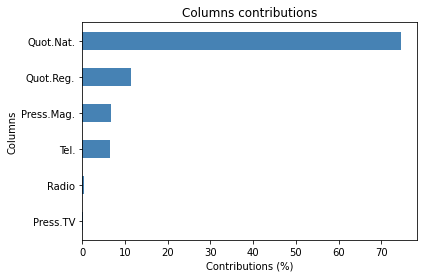

In [37]:
df_afc.plot_col_contrib(num_axis=1)

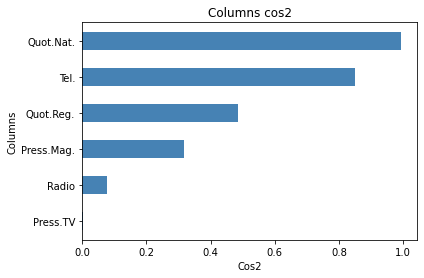

In [38]:
df_afc.plot_col_cos2(num_axis=1)

<span>&#9999;</span> Interpréter, si possible, le premier axe.

- En profil ligne la modalité Prof.cad.sup contribue le plus à la représentation du premier axe et il à une bonne qualité de représentation

- En profil colonne la modalité Quot_nat contribue le plus à la représentiation du premier axe et de plus il est bien représenté


<span>&#9757;</span> Afficher les contributions des points lignes au deuxieme axe et leurs qualités..

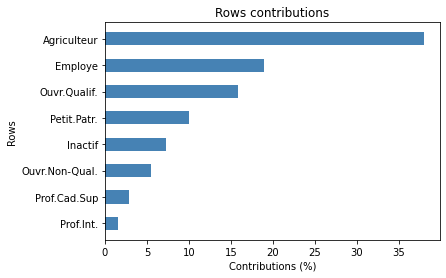

In [39]:
df_afc.plot_row_contrib(num_axis=2)

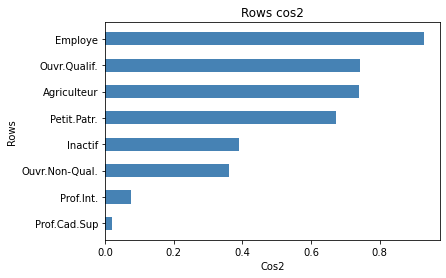

In [40]:
df_afc.plot_row_cos2(num_axis=2)

<span>&#9757;</span> Afficher les contributions des points colonnes au deuxieme axe et leurs qualités.

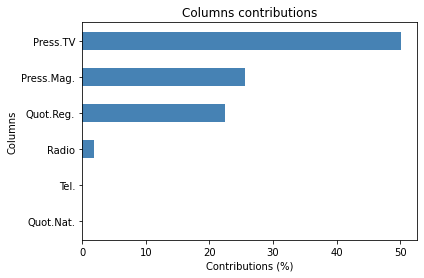

In [41]:
df_afc.plot_col_contrib(num_axis=2)

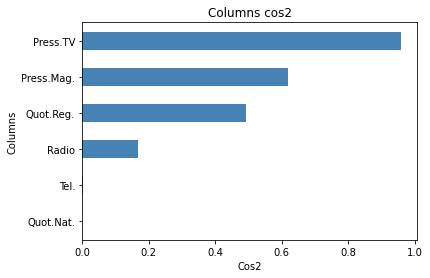

In [42]:
df_afc.plot_col_cos2(num_axis=2)

<span>&#9999;</span> Interpréter, si possible, le deuxieme axe.

- En profil ligne la modalité Agriculteur contribue le plus à la représentiation du deuxième axe mais il n'est pas très bien représenté. Mais la modalité Employé et ouvrier qualifié peuvent expliqué est le plus bien représenté sur cet axe.
- En profil colonne la modalité Press.TV contribue le plus à la représentation du deuxième axe et il à une bonne qualité de représentation
